# tvAR2
# Gaussian Kernel
# Increasing T
# Fixed t=50

In [170]:
import sys
import os

sys.path.append(os.path.abspath('D:/ExperimentsPhD/wasslsp'))

In [171]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from src.utils import *
from src.kernels import Kernel

import warnings
warnings.filterwarnings('ignore')

# T=100

In [134]:
T = 100
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

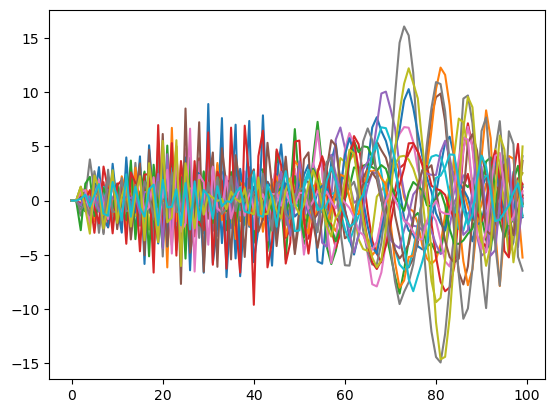

In [135]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [5]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])

In [136]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

In [137]:
X_tvar_2_replications.shape

(20, 100)

In [138]:
X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

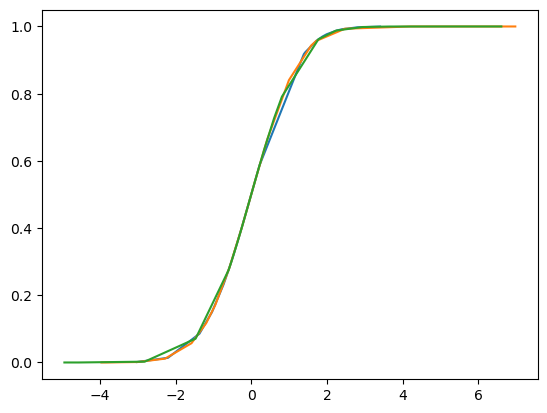

In [139]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [140]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)

In [141]:
weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


In [142]:
weights_50['0'].shape

(100, 100)

In [143]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,8.201143e-02,8.200385e-02,8.198112e-02,1.992558e-02,1.854209e-02,7.614081e-02,7.999803e-02,5.542106e-03,1.524401e-03,1.279631e-02,...,7.733687e-09,1.326559e-03,9.104030e-05,4.613333e-05,9.753710e-04,1.091829e-03,4.612356e-04,1.607176e-03,4.488064e-03,3.867437e-03
1,8.175329e-02,8.176084e-02,8.175329e-02,1.987388e-02,1.849739e-02,7.597130e-02,7.983469e-02,5.531812e-03,1.521851e-03,1.277726e-02,...,7.838628e-09,1.344808e-03,9.230976e-05,4.678526e-05,9.893371e-04,1.107667e-03,4.680128e-04,1.631093e-03,4.555694e-03,3.926440e-03
2,8.149511e-02,8.151770e-02,8.152523e-02,1.982210e-02,1.845261e-02,7.580139e-02,7.967085e-02,5.521480e-03,1.519289e-03,1.275811e-02,...,7.944909e-09,1.363294e-03,9.359595e-05,4.744590e-05,1.003493e-03,1.123723e-03,4.748847e-04,1.655348e-03,4.624294e-03,3.986301e-03
3,3.409140e-02,3.410716e-02,3.411661e-02,1.403163e-01,4.093251e-03,3.372260e-02,4.704835e-02,1.126029e-01,4.183214e-05,9.312389e-04,...,8.496539e-11,5.967392e-03,8.387864e-03,4.179987e-04,1.488685e-05,2.616347e-05,3.684691e-06,2.270345e-04,4.750355e-02,4.096014e-04
4,2.360603e-02,2.362130e-02,2.363222e-02,3.045782e-03,1.044092e-01,1.149832e-02,2.274916e-02,9.448626e-04,3.960469e-02,3.608113e-04,...,1.017006e-12,6.083436e-06,8.679493e-05,1.516961e-03,1.323946e-02,2.256662e-05,1.916077e-05,1.168038e-05,2.188470e-04,3.975267e-02
5,8.089818e-02,8.096548e-02,8.101786e-02,2.094153e-02,9.596025e-03,8.713561e-02,7.885656e-02,5.536097e-03,5.971412e-04,2.259447e-02,...,5.266985e-08,3.421637e-03,6.496329e-05,1.591506e-05,4.944945e-04,2.347796e-03,8.763064e-04,4.160322e-03,6.692546e-03,1.983994e-03
6,8.081631e-02,8.089849e-02,8.096578e-02,2.777987e-02,1.805181e-02,7.497842e-02,8.285030e-02,8.890432e-03,1.183258e-03,9.715607e-03,...,4.477570e-09,1.773785e-03,2.000822e-04,8.168600e-05,7.570438e-04,7.814526e-04,2.919750e-04,1.410287e-03,7.084320e-03,3.830817e-03
7,1.304260e-02,1.305828e-02,1.307156e-02,1.548836e-01,1.746601e-03,1.226230e-02,2.071060e-02,1.930029e-01,9.328348e-06,1.340388e-04,...,3.088301e-12,3.731258e-03,3.370245e-02,1.018913e-03,2.515179e-06,2.409213e-06,2.378043e-07,3.754811e-05,5.596748e-02,1.458465e-04
8,2.988206e-03,2.992350e-03,2.995946e-03,4.792779e-05,6.098085e-02,1.101709e-03,2.295995e-03,7.770097e-06,1.607628e-01,6.034661e-05,...,8.417176e-14,3.719663e-08,5.421297e-07,1.624397e-04,6.642962e-02,7.460742e-06,1.688402e-05,8.200100e-07,1.861247e-06,5.084239e-02
9,2.481704e-02,2.485605e-02,2.489052e-02,1.055583e-03,5.496434e-04,4.124260e-02,1.865157e-02,1.104604e-04,5.970449e-05,1.590522e-01,...,1.027201e-04,3.832786e-03,1.248066e-07,1.452839e-08,1.485791e-04,5.899553e-02,3.190837e-02,5.438250e-02,6.656231e-04,1.551897e-04


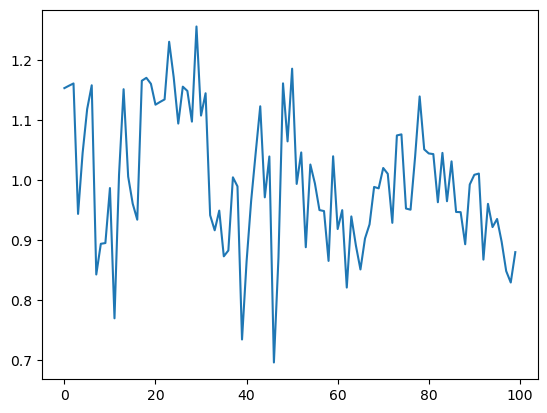

In [144]:
plt.plot(gaussian_weights_['0'])

In [158]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [159]:
weights_50['0'].shape

(100, 100)

In [147]:
replicated_NW_cdfs_50['0'].shape

(100,)

<Axes: >

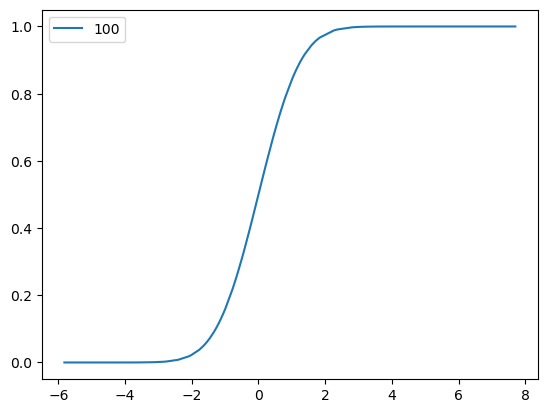

In [152]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [160]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(20, 100) (20, 100)


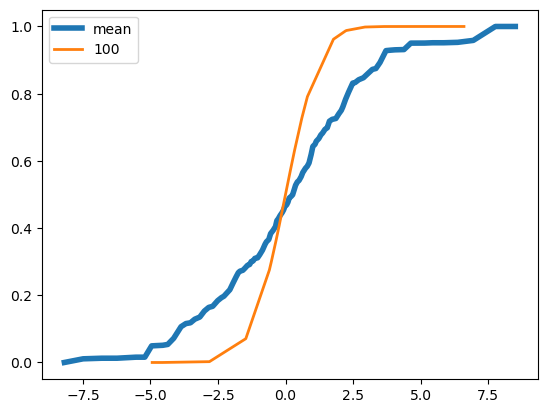

Wasserstein distance for each replication:  [0.1560399436008119, 0.16799497650859319, 0.5293766833140681, 0.23735404227146462, 0.06916105965775171, 0.28641386263603835, 0.23880457831401952, 0.17613284274068328, 0.20921947075460195, 0.057352515298660034, 0.11070893745437721, 0.3724899477682826, 0.16563720529013512, 0.2559695328973513, 0.17261353868180843, 0.27928068891342844, 0.07280280226553797, 0.22653273940789304, 0.06511886329137258, 0.2339511534517587]


In [165]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [166]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

In [167]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.11044278075131106

In [79]:
1 / (T**.5 *bandwith**(d+1))  + bandwith

0.9868308976105993

# T=500

In [185]:
T = 500
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

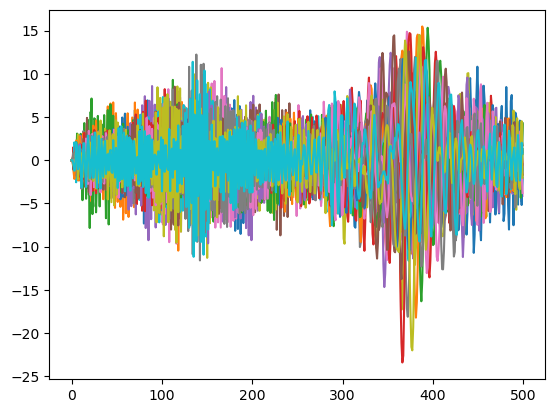

In [186]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [187]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

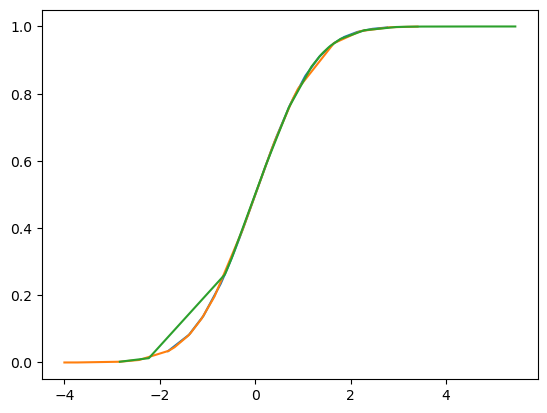

In [188]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [189]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


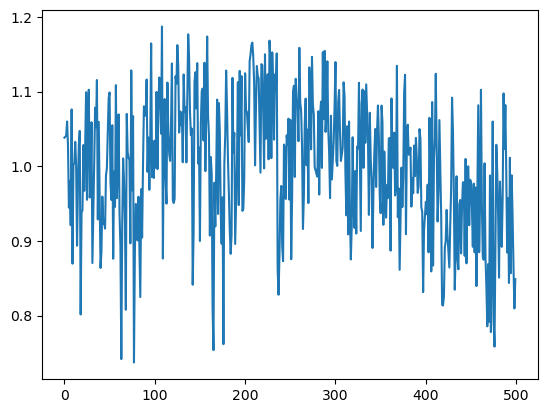

In [190]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [191]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

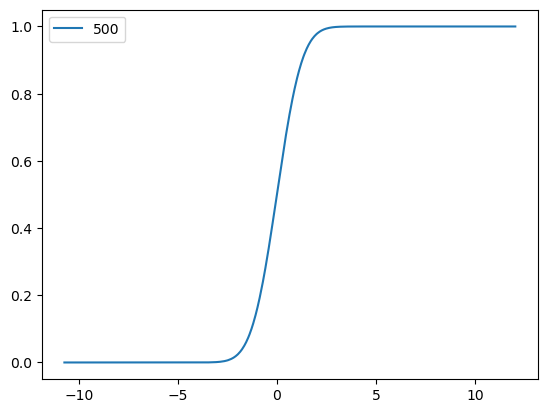

In [192]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 500) (20, 500)


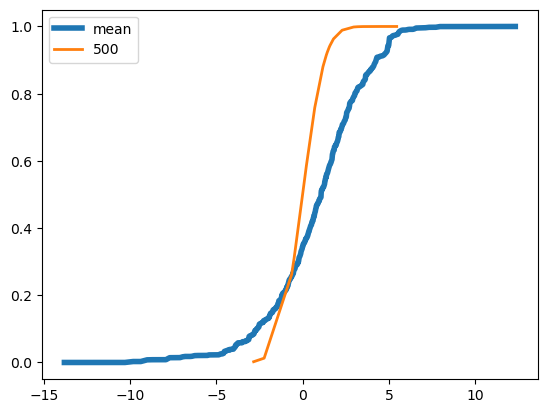

Wasserstein distance for each replication:  [0.42007156053162825, 0.22155837952543284, 0.31607705820858945, 0.3978829353212767, 0.21355065365678294, 0.2507942175274345, 0.45044913416886456, 0.5590680567448723, 0.26795193588876487, 0.22752598156834836, 0.3756611661598571, 0.31590255275350076, 0.3098413923729615, 0.31828526427162124, 0.46222292721073294, 0.2892529428818237, 0.03884668759163705, 0.46566907630292886, 0.6168016639544208, 0.2924457741929586]


In [193]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [194]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.3362355325554607

# T=1000

In [92]:
T = 1000
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

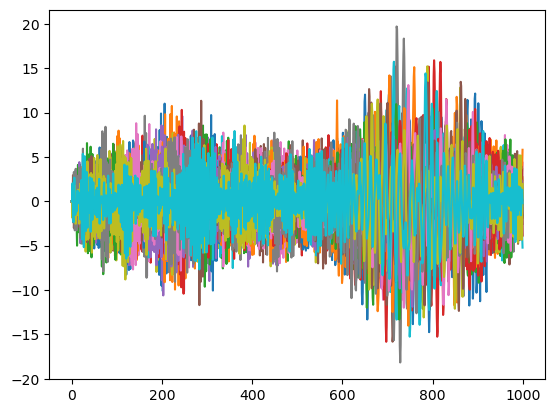

In [93]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [95]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

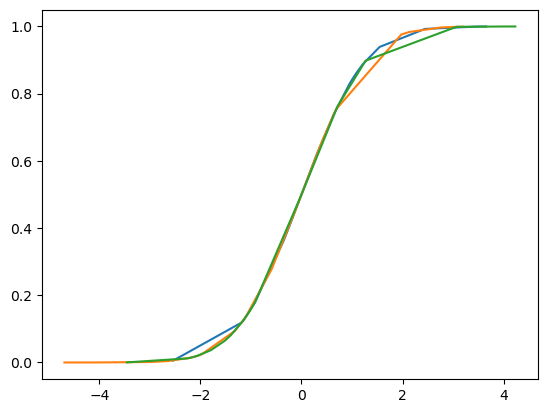

In [97]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [98]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


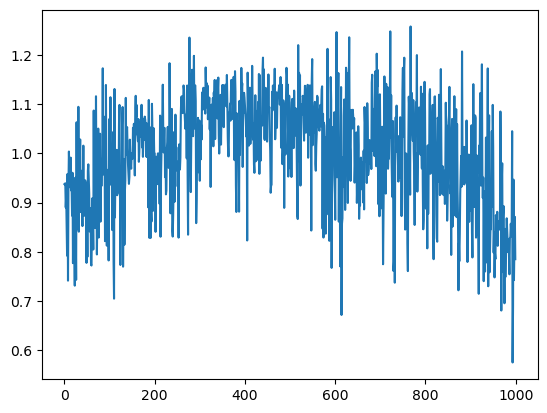

In [99]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [100]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

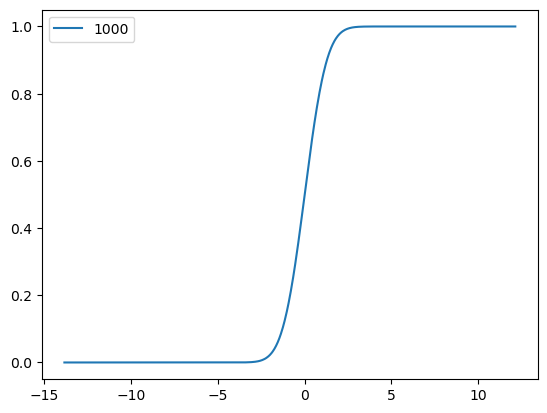

In [101]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 1000) (20, 1000)


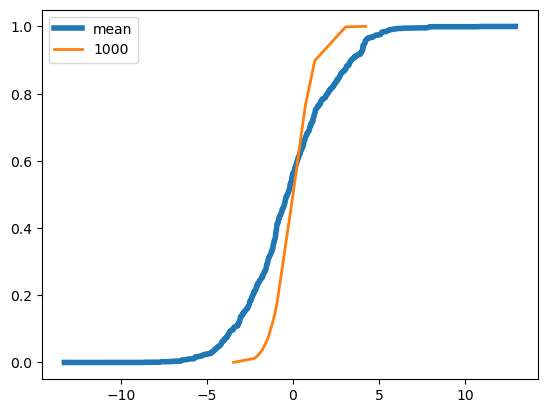

Wasserstein distance for each replication:  [0.20145167255307425, 0.25509544645179966, 0.32397005548366237, 0.18091077116406096, 0.09813021717328353, 0.35227936738088234, 0.20150858331948623, 0.10986955948370458, 0.09468936150340676, 0.140647225598618, 0.16834092962726868, 0.20378568134803546, 0.3222155473873751, 0.1707510453685956, 0.11385890603100507, 0.25209477256579355, 0.17598193883649926, 0.2655131743403961, 0.15982894385328653, 0.19874448741097747]


In [102]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [103]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.183716303189013

# T=1500

In [111]:
T = 1500
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

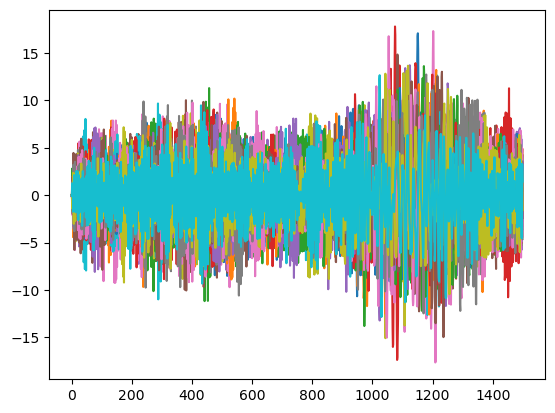

In [112]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [113]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

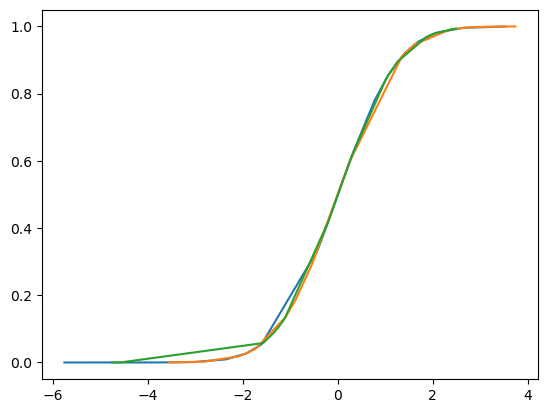

In [115]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [116]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


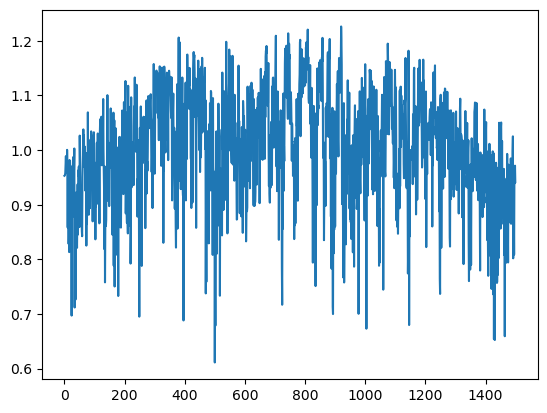

In [117]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [118]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

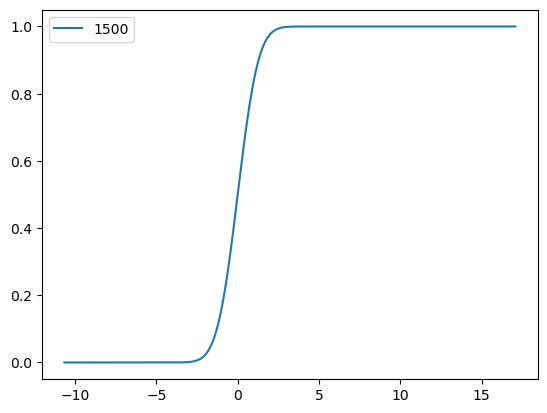

In [119]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 1500) (20, 1500)


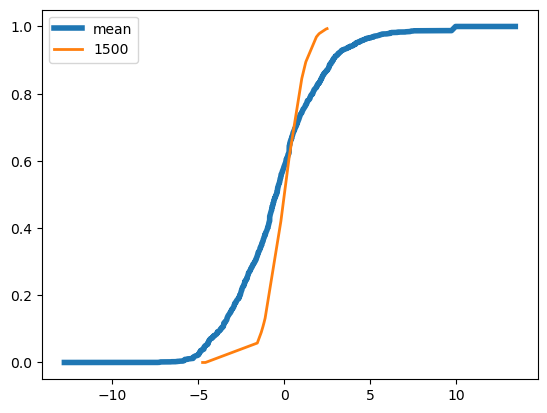

Wasserstein distance for each replication:  [0.057879765836820654, 0.1570661977116257, 0.19870688793262584, 0.11835668635082723, 0.1813107894748392, 0.0753926376341138, 0.0586310730064889, 0.1018902561186564, 0.13267835527054625, 0.13736340075411999, 0.12828234888654425, 0.0408029320816582, 0.0370414538527417, 0.3131806748215818, 0.12965811708192349, 0.11738124783772369, 0.139430591667008, 0.13336422454300415, 0.042747098076115625, 0.16876464354343249]


In [120]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [121]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09106253956161565

# T=2000

In [122]:
T = 2000
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

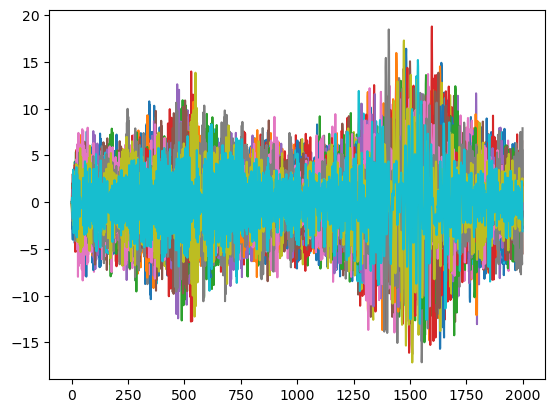

In [123]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [124]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

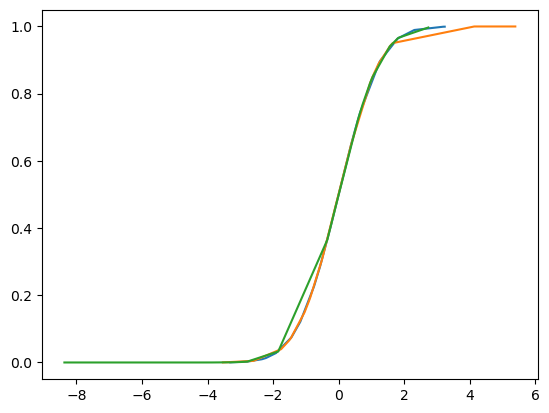

In [125]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [126]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


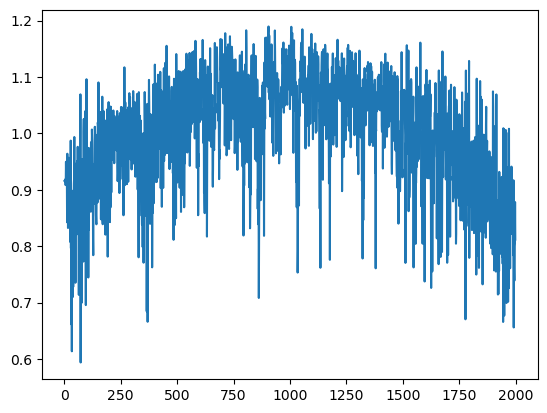

In [127]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [128]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

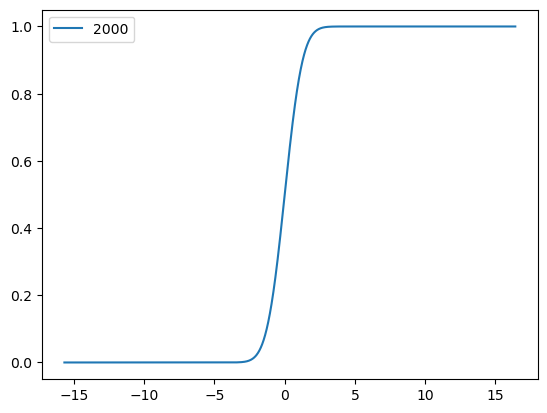

In [129]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 2000) (20, 2000)


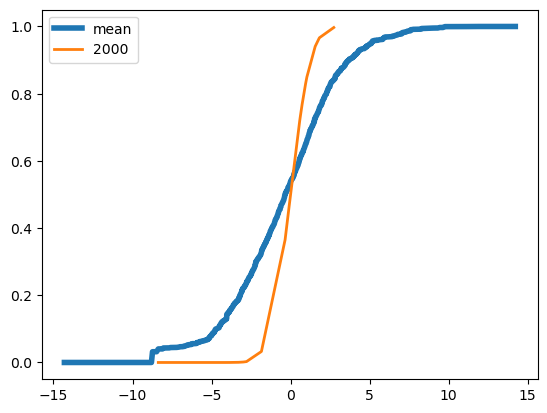

Wasserstein distance for each replication:  [0.17774249554281274, 0.2405647279296774, 0.13755385359209799, 0.10761178298499381, 0.11557078988573687, 0.19240428324180875, 0.2832271580788287, 0.17147024521109844, 0.09751972488060934, 0.22131823319286628, 0.31498982567159706, 0.08322556470669233, 0.0688975197586322, 0.41209926261870866, 0.20402996078634014, 0.26214022049325625, 0.547967493697187, 0.08801392199583816, 0.23811717110614983, 0.05658976686886523]


In [130]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [131]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.15285609506990314

# T=10000

In [195]:
T = 10000
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

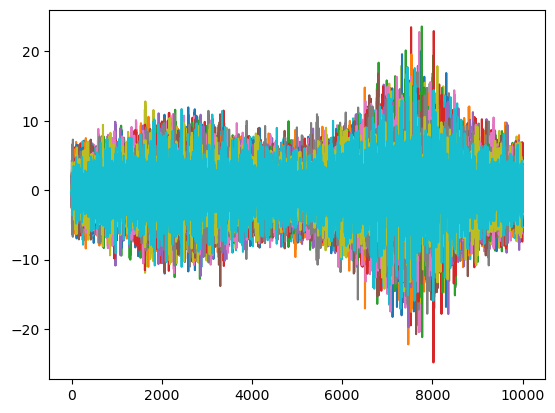

In [196]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [197]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

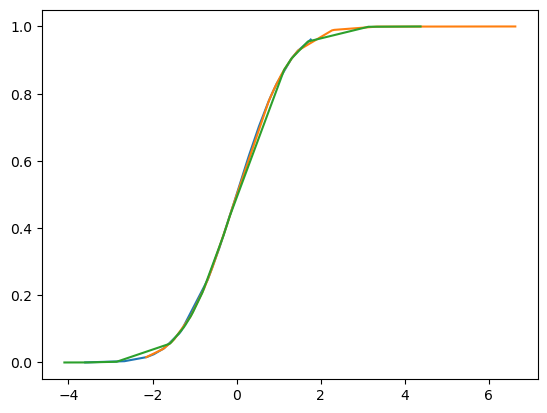

In [198]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [ ]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


In [ ]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [ ]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [ ]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [ ]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [ ]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)